**Random search with diminishing steplength**

In this problem, we use random search and a diminishing steplength to minimize the Rosenbrock function  𝑔(𝑤1,𝑤2)=100(𝑤2−𝑤21)2+(𝑤1−1)2 . This function has a global minimum at the point  𝑤∗=[11]𝑇  located in a very narrow and curved valley.
Make two runs of random search using  𝑃=1000 , the initial point  𝑤0=[−2−2]𝑇 , and  𝐾=50  steps. With the first run use a fixed steplength  𝛼=1 , and with the second run a diminishing steplength as detailed in Section 2.5.4. Compare the two runs by plotting log of the cost function.


In [4]:
import numpy as np
np.random.seed(0)

In [5]:
np.random.seed(0)
# define the runction g

g = lambda w: 100*(w[1]-w[0]*w[0])*(w[1]-w[0]*w[0]) + (w[0]-1)*(w[0]-1)

In [6]:
# random search function
def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        # construct set of random unit directions
        directions = np.random.randn(num_samples,np.size(w))
        norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
        directions = directions/norms   
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

In [7]:
# run random search algorithm 
alpha_choice = 1; w = np.array([-2,-2]); num_samples = 1000; max_its = 50;
weight_history,cost_history = random_search(g,alpha_choice,max_its,w,num_samples)

In [8]:
# run random search algorithm 
alpha_choice = 'diminishing'; w = np.array([-2,-2]); num_samples = 1000; max_its = 50;
weight_history1,cost_history1 = random_search(g,alpha_choice,max_its,w,num_samples)

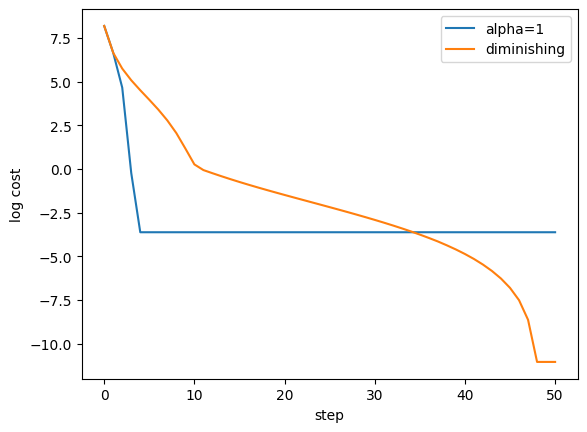

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.log(np.array(cost_history)));
plt.plot(np.log(np.array(cost_history1)));
plt.xlabel("step");
plt.ylabel("log cost");
plt.legend(["alpha=1", "diminishing"]);